# A. Gather


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import requests
import re
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import seaborn as sns


## 1- Gather the downloaded enhanced twitter archive csv file 

In [2]:
#Read the twitter-archive-enhanced csv file as a dataftrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1481,693280720173801472,NaN,NaN,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
210,852189679701164033,NaN,NaN,2017-04-12 16:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailor. He has collected the best dirt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852189679...,12,10,Sailor,None,None,None,None


## 2- Gather the image predictions tsv file 

In [3]:
#programmatically download the image prediction file with request library using the URL: 
#https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
if not os.path.exists('image_predictions'):
    os.makedirs('image_predictions')
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Check if the request was succeeded
response


<Response [200]>

In [4]:
#Specify the downloaded file name using its position in the url
with open(os.path.join('image_predictions', url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
#check if the file downloaded successfully at the specfied directory
os.listdir('image_predictions')

['image-predictions.tsv']

In [5]:
#Read the image-predictions tsv file as a dataftrame from image_predictions sub-folder
image_predictions_df= pd.read_csv('image_predictions//image-predictions.tsv', sep = '\t')
image_predictions_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True


## 3- Gather additional data from twitter using twitter's APIs 

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
'''
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nfrom tweepy import OAuthHandler\nfrom timeit import default_timer as timer\n\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returne

### Open one tweet from tweet-json text file to recognize the file contents

In [7]:
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        break
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

### Read the tweet-json text file as a dataframe

In [8]:
#Read the tweet-json text file line by line
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
additional_df = pd.DataFrame(df_list)
additional_df.sample(3)

,tweet_id,retweet_count,favorite_count,user_count
1752,678798276842360832,1350,3804,3200953
1718,680145970311643136,1972,3955,3200953
2208,668620235289837568,45,211,3201014


# B. Assessing


In [9]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
441,819711362133872643,NaN,NaN,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
1118,732005617171337216,NaN,NaN,2016-05-16 00:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He has no self control. Tongue ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet George. He looks slightly ...,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
540,806542213899489280,NaN,NaN,2016-12-07 16:53:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,None,None,None,None
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
355,830956169170665475,NaN,NaN,2017-02-13 01:46:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,None,None,None,None


In [10]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1113,724405726123311104,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,1,golden_retriever,0.240695,True,cocker_spaniel,0.202444,True,feather_boa,0.159348,False
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
1489,782598640137187329,https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg,1,malamute,0.840871,True,Tibetan_mastiff,0.140516,True,Eskimo_dog,0.012012,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
1874,845397057150107648,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True
688,684177701129875456,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,0.138612,True


In [11]:
additional_df.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
169,859074603037188101,14740,35553,3200891
2105,670465786746662913,608,1048,3201009
2065,671141549288370177,713,1246,3201008
351,831315979191906304,1264,7117,3200892
830,768596291618299904,1473,5592,3200906
124,868622495443632128,6275,28295,3200891
2239,667915453470232577,59,222,3201015
759,778383385161035776,1271,6515,3200902
570,801538201127157760,2391,9141,3200898
56,881268444196462592,5358,23501,3200890


In [12]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [14]:
additional_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user_count'], dtype='object')

In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [18]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
archive_df['expanded_urls'].isna().sum()

59

In [20]:
archive_df[archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
archive_df['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Toffee       1
Blu          1
Erik         1
Obi          1
Harvey       1
Name: name, Length: 957, dtype: int64

In [24]:
# Check all lower case names
wrong_names1 = archive_df.loc[(archive_df.name.str.islower())].name.value_counts().index.tolist()
wrong_names1


['a',
 'the',
 'an',
 'very',
 'one',
 'quite',
 'just',
 'mad',
 'not',
 'actually',
 'getting',
 'old',
 'life',
 'unacceptable',
 'infuriating',
 'by',
 'such',
 'space',
 'officially',
 'his',
 'all',
 'this',
 'my',
 'incredibly',
 'light']

In [25]:
# Check all names less than three characters
wrong_names2 = archive_df.loc[archive_df['name'].str.len() < 3].name.value_counts().index.tolist()
wrong_names2

['a', 'Bo', 'an', 'Ed', 'Al', 'by', 'Jo', 'O', 'JD', 'Mo', 'my']

In [26]:
#Check duplicated jpg_url in image prediction data
duplicate = image_predictions_df[image_predictions_df.duplicated('jpg_url')]
duplicate

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [27]:
# extract text and rating_numerator for  observations with decimal ratings
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [28]:
# extract rating_numerator for observations with decimal ratings in text

archive_df.iloc[45]['rating_numerator'], archive_df.iloc[340]['rating_numerator'], archive_df.iloc[695]['rating_numerator'], archive_df.iloc[695]['rating_numerator'], archive_df.iloc[763]['rating_numerator'], archive_df.iloc[1689]['rating_numerator'], archive_df.iloc[1712]['rating_numerator']   

(5, 75, 75, 75, 27, 5, 26)

In [29]:
image_predictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## Quality issues

#### For the twitter archive enhanced data
1- There are retweets corresponding to rows where the value of 'in_reply_to_status_id' column is non-null

2- There are orignal tweets without pictures although the analysis is about dog's picture rating

3- There are columns that will be not used in the analysis most of them belongs to the retweet case plus the expanded urls column.    

4- There are a lot of wrong names

5- The rating_denominator should be equal 10

6- There are some observation with decimal ratings

7- tweet id is integer and timestamp is string

8 - the rating smaller than 5 is illogical, this is a dog lovers society. So that these may be not pictures of dogs

#### For the image prediction data
9- tweet id is integer and number of images is float

10- There are duplicated values in the image url column 

11- The names of columns is confusing

12- The number images values is confusing for using in visualization

#### For the additional data

13- The tweet id is integer


                                                    
                                                    
                                                     
                                                

## Tidiness issues
#### For the twitter archive enhanced data
1- The two columns of rating_numerator and rating_denominator are representing the same rating variable

2- The four columns of dog's stages are representing the same variable


#### For image prediction and additional data
3- The six columns containg algorthm types and confidence levels which give predictions of dog type
   are so confused

4- the additional data gives some extra attributes for the twitter archive data Also the image prediction contains extra
   information about the same tweets in twitter archive data



# C. Cleaning

## Quality


In [30]:
archive_clean_df= archive_df.copy()
image_pred_clean_df = image_predictions_df.copy()
additional_clean_df = additional_df

### Define
### 1- Remove the rows containing the retweets in enhanced twitter archive dataframe


### Code

In [31]:
archive_clean_df = archive_clean_df[archive_clean_df.retweeted_status_id.isnull()]

### Test

In [32]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Define
### 2- Remove the rows where the expanded_url value is missing in enhanced twitter archive dataframe

### Code

In [33]:
archive_clean_df = archive_clean_df[archive_clean_df.expanded_urls.notnull()]

### Test

In [34]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

### Define
### 3- Remove the columns containing the retweets vraiables plus the   in enhanced twitter archive dataframe

### Code

In [35]:
archive_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [36]:
archive_clean_df = archive_clean_df.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

### Test

In [37]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define
### 4- Detect the wrong names of dogs and repace it with None in 

### Code

In [38]:
# detect all lower case names
wrong_names_1 = archive_clean_df.loc[(archive_clean_df.name.str.islower())].name.value_counts().index.tolist()

#replace it with None
for name in wrong_names_1:
    archive_clean_df.loc[archive_clean_df.name == name, 'name'] = None

In [39]:
# detect all names less than three characters and replace by None
wrong_names_2 = archive_clean_df.loc[archive_clean_df['name'].str.len() < 3].name.value_counts().index.tolist()
#replace it with None
for name in wrong_names_2:
    archive_clean_df.loc[archive_clean_df.name == name, 'name'] = None

### test

In [40]:
archive_clean_df['name'].value_counts()

None       622
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Striker      1
Jay          1
Aldrick      1
Apollo       1
Harvey       1
Name: name, Length: 924, dtype: int64

### Define
### 5- If the rating denominator not equal 10, replace its value with 10

### Code

In [41]:
# All denominator valuse set to 10 
archive_clean_df['rating_denominator'] = archive_clean_df.rating_denominator.apply(lambda s: 10 if s != 10 else s) 

### Test

In [42]:
archive_clean_df['rating_denominator'].value_counts()

10    2117
Name: rating_denominator, dtype: int64

### Define
### 6- Extract the rating numerator with decimal point and set the correct values manually

### Code

In [43]:
# extract text and rating_numerator for  observations with decimal ratings
archive_clean_df[archive_clean_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [44]:
#display the corresponding full text ro extract the rating numenator

archive_clean_df.iloc[45]['text'], archive_clean_df.iloc[695]['text'] , archive_clean_df.iloc[763]['text'] , archive_clean_df.iloc[1712]['text']
 


("This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu",
 "This is Luna. She's just heckin precious af I have nothing else to say. 12/10 https://t.co/gQH2mmKIJW",
 'This is Calvin. He just loves America so much. 10/10 would roll around in flag with https://t.co/RXdzWaCQHm',
 "This is Raymond. He's absolutely terrified of floating tennis ball. 10/10 it'll be ok pupper https://t.co/QyH1CaY3SM")

In [45]:
# Enter the values manually
archive_clean_df.iloc[45, archive_clean_df.columns.get_loc('rating_numerator')] = 12
archive_clean_df.iloc[695, archive_clean_df.columns.get_loc('rating_numerator')] = 12
archive_clean_df.iloc[763, archive_clean_df.columns.get_loc('rating_numerator')] = 10
archive_clean_df.iloc[1712, archive_clean_df.columns.get_loc('rating_numerator')] = 10

In [46]:
archive_clean_df.iloc[45]['rating_numerator'], archive_clean_df.iloc[695]['rating_numerator'] , archive_clean_df.iloc[763]['rating_numerator'] , archive_clean_df.iloc[1712]['rating_numerator']

(12, 12, 10, 10)

### Define
### 7- Change tweet id datatype to string and timestamp to datetime 

### Code

In [47]:
archive_clean_df['tweet_id'] = archive_clean_df['tweet_id'].astype(str)
archive_clean_df['timestamp'] = pd.to_datetime(archive_clean_df['timestamp'])


### Test

In [48]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   text                2117 non-null   object             
 3   rating_numerator    2117 non-null   int64              
 4   rating_denominator  2117 non-null   int64              
 5   name                2001 non-null   object             
 6   doggo               2117 non-null   object             
 7   floofer             2117 non-null   object             
 8   pupper              2117 non-null   object             
 9   puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 181.9+ KB


### Define
### 8- Remove rows corresponding to rating numerator less than 5

### Code

In [49]:
archive_clean_df = archive_clean_df[archive_clean_df.rating_numerator >= 5]

### Test

In [50]:
archive_clean_df['rating_numerator'].value_counts()

12      489
10      436
11      417
13      295
9       154
8        98
7        52
14       40
5        34
6        32
84        1
24        1
26        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
143       1
420       1
1776      1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Define
### 9- Change tweet id datatype to string and number of images to categorical 

### Code

In [51]:
image_pred_clean_df['tweet_id'] = image_pred_clean_df['tweet_id'].astype(str)
image_pred_clean_df['img_num'] = image_pred_clean_df['img_num'].astype('category')


### Test

In [52]:
image_pred_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   object  
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   category
 3   p1        2075 non-null   object  
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   object  
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   object  
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Define
### 10- Drop the dublicated image url rows

### Code

In [53]:
image_pred_clean_df = image_pred_clean_df.drop_duplicates(subset=['jpg_url'], keep='last')


### Test


In [54]:
duplicate = image_pred_clean_df[image_pred_clean_df.duplicated('jpg_url')]
duplicate

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define
### 11- Rename the columns in image prediction table

### Code

In [55]:
image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [56]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_pred_clean_df.columns = cols

In [57]:
image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

### Define
### 12- Replace img_num values to be one image, two images, three images and four images insted of 1,2,3 and 4

### Code

In [58]:
# Change the datarype to string 
image_pred_clean_df['img_num'] = image_pred_clean_df['img_num'].astype(str)

In [59]:
# replace the image number values
image_pred_clean_df['img_num'] = image_pred_clean_df.img_num.apply(lambda s: 'one image' if s == '1' else s) 
image_pred_clean_df['img_num'] = image_pred_clean_df.img_num.apply(lambda s: 'two images' if s == '2' else s) 
image_pred_clean_df['img_num'] = image_pred_clean_df.img_num.apply(lambda s: 'three images' if s == '3' else s) 
image_pred_clean_df['img_num'] = image_pred_clean_df.img_num.apply(lambda s: 'four images' if s == '4' else s) 


### Test

In [60]:
image_pred_clean_df['img_num'].value_counts()

one image       1724
two images       193
three images      62
four images       30
Name: img_num, dtype: int64

### Define
### 13- Change tweet id datatype to string in the additional dataframe 

### Code

In [61]:
additional_clean_df['tweet_id'] = additional_clean_df['tweet_id'].astype(str)

### Test

In [62]:
additional_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   user_count      2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


## Tidiness

### Define
### 1- Use one column for the rating in the twiiter archive data

### Code

In [63]:
# adding a column for rating variable
archive_clean_df['rating'] = archive_clean_df.rating_numerator / archive_clean_df.rating_denominator
# drop rating_numerator and rating_denominator'
archive_clean_df = archive_clean_df.drop(['rating_numerator', 
                                                    'rating_denominator'], 1)

### Test

In [64]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating'],
      dtype='object')

### Define
### 2- Use one column for the dog's stage in the twiiter archive data

### Code

In [65]:
archive_clean_df.doggo.replace('None', '', inplace=True)


In [66]:
# handle none
archive_clean_df.doggo.replace('None', '', inplace=True)
archive_clean_df.floofer.replace('None', '', inplace=True)
archive_clean_df.pupper.replace('None', '', inplace=True)
archive_clean_df.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean_df['dog_stage'] = archive_clean_df.doggo + archive_clean_df.floofer + archive_clean_df.pupper + archive_clean_df.puppo

# handle multiple stages
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean_df.loc[archive_clean_df.dog_stage == '', 'dog_stage'] = np.nan


### Test

In [67]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating', 'dog_stage'],
      dtype='object')

In [68]:
archive_clean_df.head(20)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,,,,,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,,,,,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,,,,,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,,,,,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,,,,,1.2,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,None,,,,,1.3,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,Jax,,,,,1.3,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,None,,,,,1.3,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,Zoey,,,,,1.3,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,Cassie,doggo,,,,1.4,doggo


In [69]:
image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

### Define
### 3- get the highest prediction and create new breed and confidence variable

In [70]:
# choose the best breed prediction
dog_breed = []
confidence = []

def breed_confidence(row):
    if row['breed_1']==True:
        dog_breed.append(row['prediction_1'])
        confidence.append(row['confidence_1'])
    elif row['breed_2']==True:
        dog_breed.append(row['prediction_2'])
        confidence.append(row['confidence_2'])
    elif row['breed_3']==True:
        dog_breed.append(row['prediction_3'])
        confidence.append(row['confidence_3'])
    else:
        dog_breed.append('None')
        confidence.append(0)
image_pred_clean_df.apply(breed_confidence, axis=1)
image_pred_clean_df['dog_breed'] = dog_breed
image_pred_clean_df['confidence'] = confidence
# convert dog_breed to category type
image_pred_clean_df['dog_breed'] = image_pred_clean_df['dog_breed'].astype('category')

# drop the old prediction columns

image_pred_clean_df = image_pred_clean_df.drop(['prediction_1',
                                                    'confidence_1',
                                                    'breed_1',
                                                    'prediction_2',
                                                    'confidence_2',
                                                    'breed_2',
                                                    'prediction_3',
                                                    'confidence_3',
                                                    'breed_3'], 1)

### Test


In [71]:
image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'confidence'], dtype='object')

In [72]:
image_pred_clean_df.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,one image,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,one image,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,one image,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,one image,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,one image,miniature_pinscher,0.560311


In [73]:
image_pred_clean_df['dog_breed'].value_counts()

None                  318
golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
                     ... 
Scotch_terrier          1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
EntleBucher             1
Name: dog_breed, Length: 114, dtype: int64

### Define
### 4- Combine the three dataframes based on the tweet id

### Code


In [74]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2066 non-null   object             
 1   timestamp  2066 non-null   datetime64[ns, UTC]
 2   text       2066 non-null   object             
 3   name       1957 non-null   object             
 4   doggo      2066 non-null   object             
 5   floofer    2066 non-null   object             
 6   pupper     2066 non-null   object             
 7   puppo      2066 non-null   object             
 8   rating     2066 non-null   float64            
 9   dog_stage  337 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 177.5+ KB


In [75]:
total_df = pd.merge(archive_clean_df, image_pred_clean_df, on ='tweet_id', how= 'inner' )
total_df = pd.merge(total_df, additional_clean_df, on = 'tweet_id', how = 'inner' )

In [76]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1876
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1877 non-null   object             
 1   timestamp       1877 non-null   datetime64[ns, UTC]
 2   text            1877 non-null   object             
 3   name            1778 non-null   object             
 4   doggo           1877 non-null   object             
 5   floofer         1877 non-null   object             
 6   pupper          1877 non-null   object             
 7   puppo           1877 non-null   object             
 8   rating          1877 non-null   float64            
 9   dog_stage       294 non-null    object             
 10  jpg_url         1877 non-null   object             
 11  img_num         1877 non-null   object             
 12  dog_breed       1877 non-null   category           
 13  confidence      1877 non-null   f

### Saving to a csv file


In [77]:
# save the total dataframe in a csv file
total_df.to_csv('twitter_archive_master.csv') 


# D. Visualization

In [78]:
total_df

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating,dog_stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,,,,,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,one image,None,0.000000,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,,,,,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,one image,Chihuahua,0.323581,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,,,,,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,one image,Chihuahua,0.716012,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,,,,,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,one image,Labrador_retriever,0.168086,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,,,,,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,two images,basset,0.555712,9774,41048,3200889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,None,,,,,0.5,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,one image,miniature_pinscher,0.560311,41,111,3201018
1873,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,None,,,,,0.6,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,one image,Rhodesian_ridgeback,0.408143,147,311,3201018
1874,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,None,,,,,0.9,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,one image,German_shepherd,0.596461,47,128,3201018
1875,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,None,,,,,0.7,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,one image,redbone,0.506826,48,132,3201018


In [79]:
# Descriptive analysis
total_df[['retweet_count','favorite_count','rating']].describe()


,retweet_count,favorite_count,rating
count,1877.000000,1877.000000,1877.000000
mean,2548.359084,8432.716569,1.255088
std,4233.926889,11476.101117,4.274196
min,16.000000,81.000000,0.500000
25%,616.000000,1941.000000,1.000000
50%,1317.000000,3996.000000,1.100000
75%,2982.000000,10538.000000,1.200000
max,79515.000000,132810.000000,177.600000


### How much have dog stage improves the favorite count?


Text(0.5, 0, "The dog's stage")

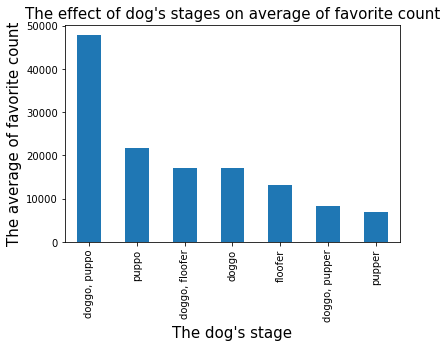

In [130]:
total_df.groupby('dog_stage').favorite_count.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("The effect of dog's stages on average of favorite count", fontsize=15)
plt.ylabel('The average of favorite count', fontsize=15)
plt.xlabel("The dog's stage", fontsize=15)


### How much have dog stage improves the retweet count?


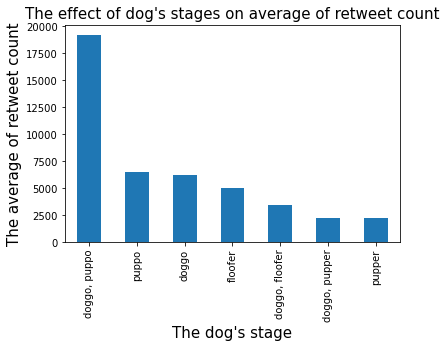

In [131]:
total_df.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("The effect of dog's stages on average of retweet count", fontsize=15)
plt.ylabel('The average of retweet count', fontsize=15)
plt.xlabel("The dog's stage", fontsize=15);

### How much have dog stage improves the rating?

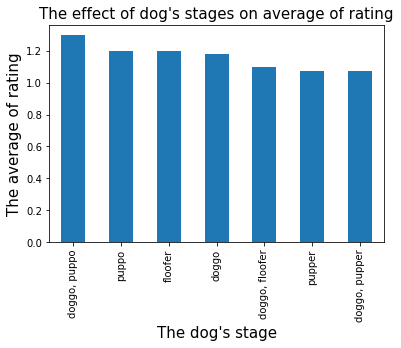

In [80]:
total_df.groupby('dog_stage').rating.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("The effect of dog's stages on average of rating", fontsize=15)
plt.ylabel('The average of rating', fontsize=15)
plt.xlabel("The dog's stage", fontsize=15);

### How much have number of images improves the favorite count?


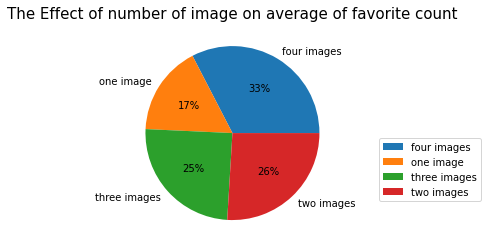

In [81]:
total_df.groupby('img_num').favorite_count.mean().plot.pie(autopct='%0.0f%%')
plt.title("The Effect of number of image on average of favorite count", fontsize=15)
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");


### How much have number of images improves the retweet count?


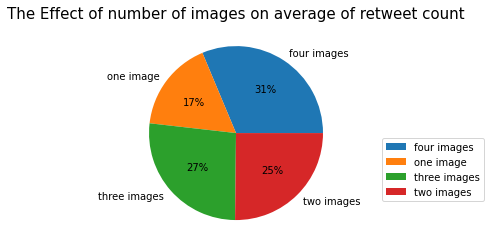

In [82]:
total_df.groupby('img_num').retweet_count.mean().plot.pie(autopct='%0.0f%%')
plt.title("The Effect of number of images on average of retweet count", fontsize=15)
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");


### How much have number of images improves the rating?


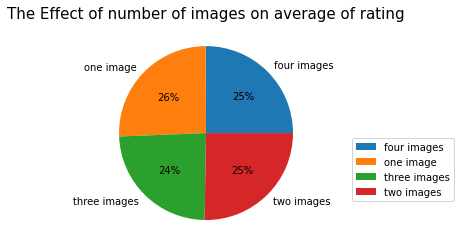

In [83]:
total_df.groupby('img_num').rating.mean().plot.pie(autopct='%0.0f%%')
plt.title("The Effect of number of images on average of rating", fontsize=15)
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");

### The top-10 tweeted breeds 

Text(0.5, 0, 'Breeds')

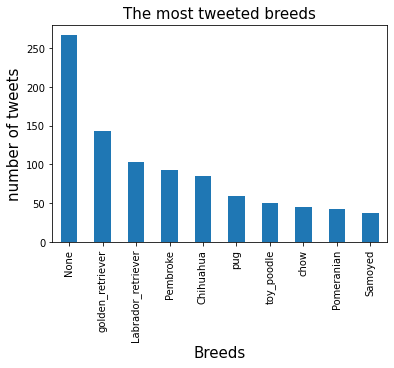

In [84]:
lovely_breeds = total_df['dog_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.title('The most tweeted breeds', fontsize=15)
plt.ylabel('number of tweets', fontsize=15)
plt.xlabel('Breeds', fontsize=15)

### The top-10 favorited breeds 

Text(0.5, 0, 'Breeds')

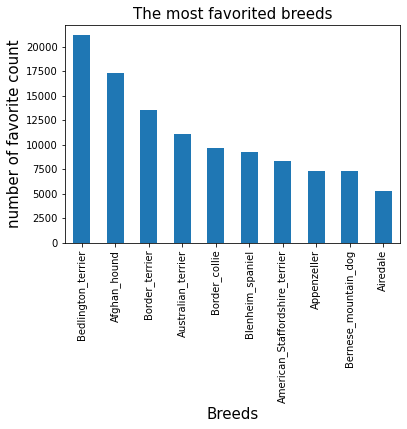

In [85]:
breed_favorite = total_df.groupby('dog_breed').favorite_count.mean()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.title('The most favorited breeds', fontsize=15)
plt.ylabel('number of favorite count', fontsize=15)
plt.xlabel('Breeds', fontsize=15)


### The top-10 retweeted breeds 

Text(0.5, 0, 'Breeds')

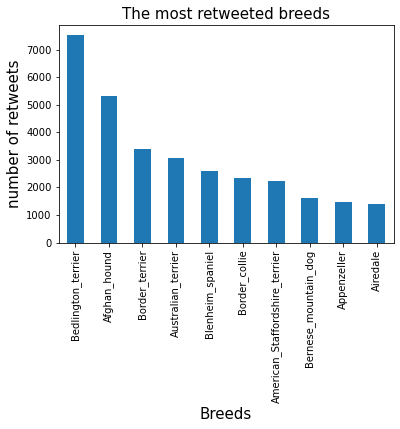

In [86]:
breed_favorite = total_df.groupby('dog_breed').retweet_count.mean()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.title('The most retweeted breeds', fontsize=15)
plt.ylabel('number of retweets', fontsize=15)
plt.xlabel('Breeds', fontsize=15)

### The top-10 rated breeds 

Text(0.5, 0, 'Breeds')

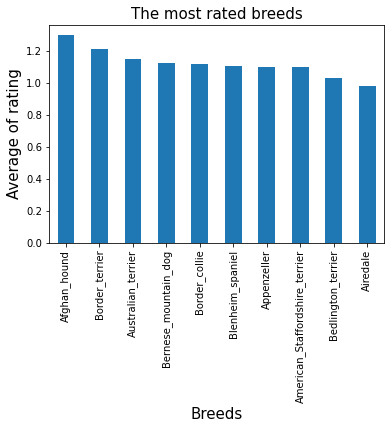

In [87]:
breed_favorite = total_df.groupby('dog_breed').rating.mean()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.title('The most rated breeds', fontsize=15)
plt.ylabel('Average of rating', fontsize=15)
plt.xlabel('Breeds', fontsize=15)